# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [30]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [32]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [33]:
# Create a Beautiful Soup object by parsing the HTML content of the webpage visited by the browser
Soup = soup(browser.html, 'html.parser')

In [34]:
# Read the HTML content of the webpage and convert it into a DataFrame using Pandas
df = pd.read_html(browser.html)[0]

# Convert the DataFrame into a list of dictionaries (each dictionary represents a row of data)
data = df.to_dict('Records')

# Print the list of dictionaries containing the extracted data
print(data)

[{'id': 2, 'terrestrial_date': '2012-08-16', 'sol': 10, 'ls': 155, 'month': 6, 'min_temp': -75.0, 'pressure': 739.0}, {'id': 13, 'terrestrial_date': '2012-08-17', 'sol': 11, 'ls': 156, 'month': 6, 'min_temp': -76.0, 'pressure': 740.0}, {'id': 24, 'terrestrial_date': '2012-08-18', 'sol': 12, 'ls': 156, 'month': 6, 'min_temp': -76.0, 'pressure': 741.0}, {'id': 35, 'terrestrial_date': '2012-08-19', 'sol': 13, 'ls': 157, 'month': 6, 'min_temp': -74.0, 'pressure': 732.0}, {'id': 46, 'terrestrial_date': '2012-08-20', 'sol': 14, 'ls': 157, 'month': 6, 'min_temp': -74.0, 'pressure': 740.0}, {'id': 57, 'terrestrial_date': '2012-08-21', 'sol': 15, 'ls': 158, 'month': 6, 'min_temp': -78.0, 'pressure': 740.0}, {'id': 68, 'terrestrial_date': '2012-08-22', 'sol': 16, 'ls': 158, 'month': 6, 'min_temp': -77.0, 'pressure': 740.0}, {'id': 79, 'terrestrial_date': '2012-08-23', 'sol': 17, 'ls': 159, 'month': 6, 'min_temp': -76.0, 'pressure': 742.0}, {'id': 112, 'terrestrial_date': '2012-08-27', 'sol': 21,

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [35]:
# Create an empty list to store Mars data
Mars_data = []

# Loop through the scraped data to create a list of rows
for record in data:
    # Create a dictionary for each row
    row = {
        'id': record['id'],  # Add 'id' value from the record
        'terrestrial_date': record['terrestrial_date'],  # Add 'terrestrial_date' value from the record
        'sol': record['sol'],  # Add 'sol' value from the record
        'ls': record['ls'],  # Add 'ls' value from the record
        'month': record['month'],  # Add 'month' value from the record
        'min_temp': record['min_temp'],  # Add 'min temp' value from the record
        'pressure': record['pressure']  # Add 'pressure' value from the record
    }
    
    # Append the dictionary to the list of Mars data
    Mars_data.append(row)

In [36]:
# Import the required library
import pandas as pd

# Create a Pandas DataFrame using the list of rows (mars_data) and column names
Mars_df = pd.DataFrame(Mars_data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [37]:
# Print the first 20 rows of the DataFrame to confirm it was created successfully
Mars_df.head(20)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [38]:
# Print the data type of each column in the DataFrame
Mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [39]:
# Convert the 'terrestrial_date' column to datetime data type
Mars_df['terrestrial_date'] = pd.to_datetime(Mars_df['terrestrial_date'])

# Change the data type of the 'id' column to object (string)
Mars_df['id'] = Mars_df['id'].astype(object)

In [40]:
# Print the data type of each column in the DataFrame to confirm type changes
Mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [41]:
# Count the number of unique months on Mars
months = Mars_df['month'].nunique()

# Print the result
print(months)

12


In [42]:
# Count the number of unique terrestrial dates (Martian days) in the DataFrame
days = Mars_df['terrestrial_date'].nunique()

# Print the result
print(days)

1867


In [43]:
# Calculate the average low temperature by month
average_low_temperature = Mars_df.groupby('month')['min_temp'].mean()

# Print the result
print(average_low_temperature)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


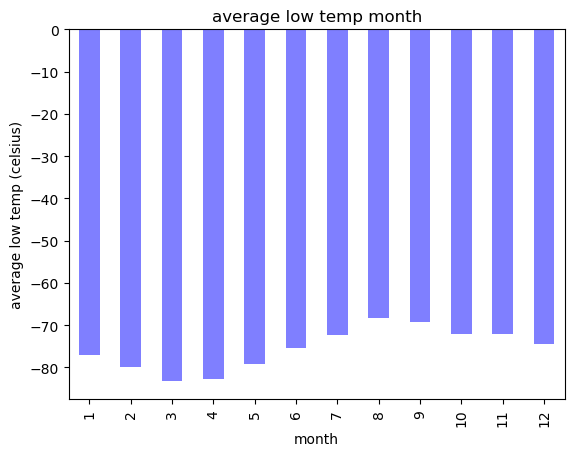

In [44]:
# Plot the average temperature by month
Mars_average_low_temperature = average_low_temperature.plot(kind='bar', color='blue', alpha=0.5, align="center")

# Add title and labels to the plot
plt.title("average low temp month")
plt.xlabel("month")
plt.ylabel("average low temp (celsius)")

# Show the plot
plt.show()

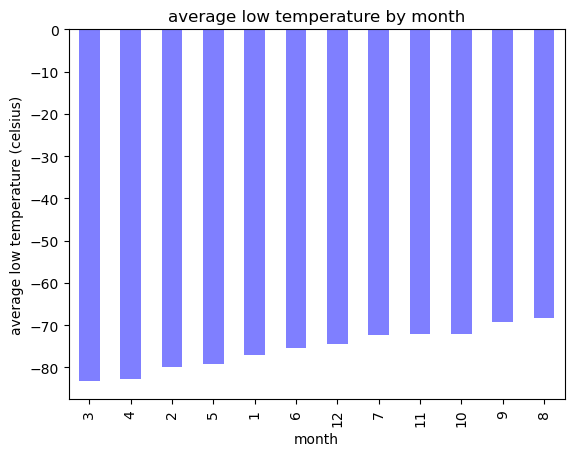

In [45]:
# Sort the average low temperature by month in ascending order
sorted_average_low_temperature = average_low_temperature.sort_values()

# Create a bar chart to visualize the average low temperature by month
sorted_average_low_temperature.plot(kind='bar', color='blue', alpha=0.5, align="center")

# Add title and labels to the plot
plt.title("average low temperature by month")
plt.xlabel("month")
plt.ylabel("average low temperature (celsius)")

# Show the plot
plt.show()

In [46]:
# Calculate the average pressure by Martian month
average_pressure = Mars_df.groupby('month')['pressure'].mean()

# Print the result
print(average_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


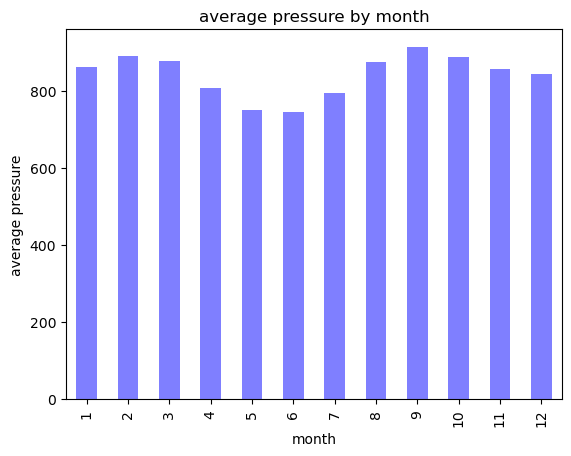

In [47]:
# Plot the average pressure by month
average_temperature_graph = average_pressure.plot(kind='bar', color='blue', alpha=0.5, align="center")

# Add title and labels to the plot
plt.title("average pressure by month")
plt.xlabel("month")
plt.ylabel("average pressure")

# Show the plot
plt.show()

In [48]:
# Find the number of unique terrestrial dates (Earth days)
earth_days = Mars_df['terrestrial_date'].nunique()

# Find the number of unique sols (Martian days)
martian_days = Mars_df['sol'].nunique()

# Calculate the ratio of Martian days to Earth days
ratio = martian_days / earth_days

# Print the result
print("There are approximately", ratio, "terrestrial days in a Martian year.")

There are approximately 1.0 terrestrial days in a Martian year.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [49]:
# Write the DataFrame to a CSV file named 'mars_weather.csv'
Mars_df.to_csv('mars_weather.csv', index=False)

In [50]:
browser.quit()